In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
def load_data(batch_size):
    transform = transforms.Compose([
        transforms.Resize((28, 28)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    trainset = datasets.MNIST('data', train=True, download=True, transform=transform)
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

    testset = datasets.MNIST('data', train=False, download=True, transform=transform)
    test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader

In [3]:
# CNN models with increasing number of parameters
class CNN1(nn.Module):  # Few parameters
    def __init__(self):
        super(CNN1, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 3, padding=1)
        self.fc1 = nn.Linear(8 * 28 * 28, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = x.view(-1, 8 * 28 * 28)
        return self.fc1(x)

class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        x = torch.relu(torch.max_pool2d(self.conv1(x), 2))
        x = torch.relu(torch.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 32 * 7 * 7)
        return self.fc1(x)

class CNN3(nn.Module):
    def __init__(self):
        super(CNN3, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(torch.max_pool2d(self.conv1(x), 2))
        x = torch.relu(torch.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

class CNN4(nn.Module):
    def __init__(self):
        super(CNN4, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(torch.max_pool2d(self.conv1(x), 2))
        x = torch.relu(torch.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

class CNN5(nn.Module):  # Increased complexity
    def __init__(self):
        super(CNN5, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(torch.max_pool2d(self.conv1(x), 2))
        x = torch.relu(torch.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 128 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

class CNN6(nn.Module):
    def __init__(self):
        super(CNN6, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.fc1 = nn.Linear(256 * 3 * 3, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(torch.max_pool2d(self.conv1(x), 2))
        x = torch.relu(torch.max_pool2d(self.conv2(x), 2))
        x = torch.relu(torch.max_pool2d(self.conv3(x), 2))
        x = x.view(-1, 256 * 3 * 3)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

class CNN7(nn.Module):
    def __init__(self):
        super(CNN7, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.fc1 = nn.Linear(256 * 3 * 3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = torch.relu(torch.max_pool2d(self.conv1(x), 2))
        x = torch.relu(torch.max_pool2d(self.conv2(x), 2))
        x = torch.relu(torch.max_pool2d(self.conv3(x), 2))
        x = x.view(-1, 256 * 3 * 3)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

class CNN8(nn.Module):
    def __init__(self):
        super(CNN8, self).__init__()
        self.conv1 = nn.Conv2d(1, 128, 3, padding=1)
        self.conv2 = nn.Conv2d(128, 256, 3, padding=1)
        self.conv3 = nn.Conv2d(256, 512, 3, padding=1)
        self.fc1 = nn.Linear(512 * 3 * 3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = torch.relu(torch.max_pool2d(self.conv1(x), 2))
        x = torch.relu(torch.max_pool2d(self.conv2(x), 2))
        x = torch.relu(torch.max_pool2d(self.conv3(x), 2))
        x = x.view(-1, 512 * 3 * 3)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

class CNN9(nn.Module):  # More complexity
    def __init__(self):
        super(CNN9, self).__init__()
        self.conv1 = nn.Conv2d(1, 128, 3, padding=1)
        self.conv2 = nn.Conv2d(128, 256, 3, padding=1)
        self.conv3 = nn.Conv2d(256, 512, 3, padding=1)
        self.fc1 = nn.Linear(512 * 3 * 3, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = torch.relu(torch.max_pool2d(self.conv1(x), 2))
        x = torch.relu(torch.max_pool2d(self.conv2(x), 2))
        x = torch.relu(torch.max_pool2d(self.conv3(x), 2))
        x = x.view(-1, 512 * 3 * 3)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

class CNN10(nn.Module):  # Most parameters
    def __init__(self):
        super(CNN10, self).__init__()
        self.conv1 = nn.Conv2d(1, 256, 3, padding=1)
        self.conv2 = nn.Conv2d(256, 512, 3, padding=1)
        self.conv3 = nn.Conv2d(512, 1024, 3, padding=1)
        self.fc1 = nn.Linear(1024 * 3 * 3, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = torch.relu(torch.max_pool2d(self.conv1(x), 2))
        x = torch.relu(torch.max_pool2d(self.conv2(x), 2))
        x = torch.relu(torch.max_pool2d(self.conv3(x), 2))
        x = x.view(-1, 1024 * 3 * 3)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)


In [4]:
# Training function
def train(model, loader, optimizer, criterion, epoch):
    model.train()
    total_loss = 0
    correct = 0
    for batch_idx, (data, target) in enumerate(loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        correct += (output.argmax(1) == target).sum().item()

        if batch_idx % 100 == 0:  # Print progress
            print(f'Epoch {epoch} [{batch_idx * len(data)}/{len(loader.dataset)}] Loss: {loss.item():.4f}')

    return total_loss / len(loader.dataset), correct / len(loader.dataset)


In [5]:
# Testing function
def test(model, loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in loader:
            output = model(data)
            test_loss += criterion(output, target).item()
            correct += (output.argmax(1) == target).sum().item()

    return test_loss / len(loader.dataset), correct / len(loader.dataset)

In [9]:
# Main function
def experiment():
    batch_size = 128
    train_loader, test_loader = load_data(batch_size)
    
    models = [CNN1(), CNN2(), CNN3(), CNN4(), CNN5(), CNN6(), CNN7(), CNN8(), CNN9(), CNN10()]
    params = []
    train_losses, test_losses = [], []
    train_accs, test_accs = [], []  

    for i, model in enumerate(models):
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        criterion = nn.CrossEntropyLoss()

        num_params = sum(p.numel() for p in model.parameters())
        params.append(num_params)

        print(f'Training Model {i+1} with {num_params} parameters')
        
        for epoch in range(10):
            train_loss, train_acc = train(model, train_loader, optimizer, criterion, epoch)
            test_loss, test_acc = test(model, test_loader, criterion)

            print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')
            print(f'Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

            if epoch == 9:  
                train_losses.append(train_loss)
                test_losses.append(test_loss)
                train_accs.append(train_acc)
                test_accs.append(test_acc)

    # Plot Loss vs. Parameters
    plt.subplot(1, 2, 1)
    plt.scatter(params, train_losses, label='train_loss')
    plt.scatter(params, test_losses, label='test_loss')
    plt.xlabel('number of parameters')
    plt.ylabel('loss')
    plt.title('model loss')
    plt.legend()

    # Plot Accuracy vs. Parameters
    plt.subplot(1, 2, 2)
    plt.scatter(params, train_accs, label='train_acc')
    plt.scatter(params, test_accs, label='test_acc')
    plt.xlabel('number of parameters')
    plt.ylabel('accuracy')
    plt.title('model accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()



Training Model 1 with 62810 parameters
Epoch 0 [0/60000] Loss: 2.2971
Epoch 0 [12800/60000] Loss: 0.3502
Epoch 0 [25600/60000] Loss: 0.3436
Epoch 0 [38400/60000] Loss: 0.2689
Epoch 0 [51200/60000] Loss: 0.0925
Epoch 1, Train Loss: 0.0025, Test Loss: 0.0011
Train Accuracy: 0.9075, Test Accuracy: 0.9612
Epoch 1 [0/60000] Loss: 0.2730
Epoch 1 [12800/60000] Loss: 0.0579
Epoch 1 [25600/60000] Loss: 0.1389
Epoch 1 [38400/60000] Loss: 0.1041
Epoch 1 [51200/60000] Loss: 0.1454
Epoch 2, Train Loss: 0.0009, Test Loss: 0.0007
Train Accuracy: 0.9667, Test Accuracy: 0.9726
Epoch 2 [0/60000] Loss: 0.1151
Epoch 2 [12800/60000] Loss: 0.1020
Epoch 2 [25600/60000] Loss: 0.0812
Epoch 2 [38400/60000] Loss: 0.0472
Epoch 2 [51200/60000] Loss: 0.0454
Epoch 3, Train Loss: 0.0006, Test Loss: 0.0007
Train Accuracy: 0.9761, Test Accuracy: 0.9734
Epoch 3 [0/60000] Loss: 0.0670
Epoch 3 [12800/60000] Loss: 0.0772
Epoch 3 [25600/60000] Loss: 0.0325
Epoch 3 [38400/60000] Loss: 0.0505
Epoch 3 [51200/60000] Loss: 0.143

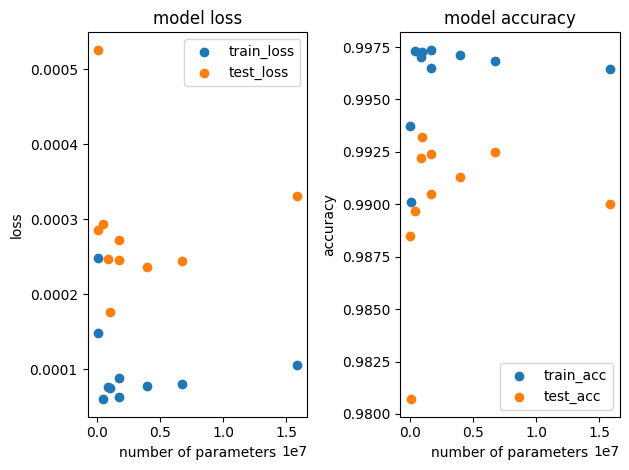

In [10]:
experiment()